In [1]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals

import re
import math
import networkx
import numpy as np

from konlpy import tag as taggers
from collections import Counter
from gensim.corpora import Dictionary, TextCorpus
from gensim.models import TfidfModel
from sklearn.cluster import Birch, DBSCAN, AffinityPropagation
from sklearn.feature_extraction import DictVectorizer


stopwords_ko = ["저", "것", "동시에", "몇", "고려하면", "관련이", "놀라다", "무엇", "어느쪽", "오", "정도의", "더구나", "아무도", "줄은모른다", "참", "아니", "휘익", "향하다", "응당", "알겠는가", "인젠", "그래서", "자신", "해서는", "둘", "이었다", "임에", "하도록시키다", "누구", "이때", "삼", "제외하고", "쿵", "하면", "좀", "그렇지않으면", "아니었다면", "이라면", "팍", "일", "통하여", "무엇때문에", "보아", "하게하다", "하는", "이르다", "타다", "까지도", "오직", "도달하다", "잠깐", "외에", "심지어", "하려고하다", "게다가", "후", "알", "비하면", "헉헉", "근거로", "월", "따라서", "않는다면", "일지라도", "함께", "이유는", "흥", "혼자", "관하여", "붕붕", "하다", "진짜로", "의해", "바와같이", "대하면", "퍽", "보다더", "그렇게", "끼익", "댕그", "시초에", "당장", "하는것만", "누가", "만이", "만일", "이지만", "하마터면", "꽈당", "만은", "우선", "없다", "휴", "하도록하다", "그런데", "비로소", "하게될것이다", "만큼 어찌됏든", "오히려", "을", "더라도", "안", "왜냐하면", "습니다", "줄은", "그리하여", "하", "어떻게", "대로", "기대여", "끙끙", "예를", "와르르", "이리하여", "이", "조차", "하고", "이젠", "뒤이어", "할줄알다", "반대로", "시각", "펄렁", "잇따라", "공동으로", "비록", "가까스로", "여덟", "비슷하다", "이상", "차라리", "이어서", "모두", "툭", "조차도", "헉", "부터", "혹시", "않고", "우리", "삐걱", "여보시오", "허", "해요", "견지에서", "하기는한데", "토하다", "않으면", "이봐", "관계가", "한다면", "시작하여", "연이서", "이외에도", "그", "운운", "에게", "그럼에도", "예", "만약에", "했어요", "결과에", "제", "오자마자", "것들", "약간", "것과", "일때", "셋", "각종", "아이구", "같은", "향해서", "일것이다", "해야한다", "아이야", "로", "편이", "등등", "해도좋다", "하기에", "김에", "몰랏다", "같이", "하도다", "즉시", "갖고말하자면", "우에", "어느", "허허", "하자마자", "에서", "그래도", "하여야", "된이상", "까악", "한켠으로는", "많은", "그중에서", "사", "낼", "뿐만", "저쪽", "어쩔수", "어떤것들", "물론", "결론을", "이만큼", "이렇게되면", "소인", "바꾸어말하면", "들", "이렇구나", "하물며", "얼마간", "얼마든지", "한항목", "하는것도", "졸졸", "한마디", "말할것도", "만약", "남들", "총적으로", "허걱", "그리고", "따지지", "구체적으로", "못하다    하기보다는", "언제", "따르는", "구토하다", "앞에서", "대해서", "아", "앞의것", "비걱거리다", "헐떡헐떡", "어찌하든지", "입장에서", "의", "마저", "바로", "하기만", "않기", "또한", "쓰여", "위해서", "의거하여", "인", "아니면", "를", "사람들", "할수있다", "일곱", "근거하여", "한적이있다", "함으로써", "낫다", "어떤것", "방면으로", "중의하나", "어", "무릎쓰고", "저것만큼", "서술한바와같이", "그런즉", "들자면", "하지", "아이고", "불문하고", "만", "마저도", "얼마만큼", "예컨대", "이렇게말하자면", "연관되다", "않다면", "들면", "이쪽", "의지하여", "여섯", "그저", "아니다", "그렇지만", "기준으로", "되어", "가", "무렵", "즉", "말하면", "어찌", "그럼", "그위에", "그런", "조금", "매번", "혹은", "이천구", "중에서", "따름이다", "하기", "가령", "잠시", "아무거나", "하기보다는", "주저하지", "당신", "봐라", "그렇지", "자기집", "할지라도", "요만한걸", "우르르", "못하다", "왜", "이렇게", "퉤", "관계없이", "그래", "대해", "쪽으로", "저것", "자기", "아홉", "지만", "구", "하지마", "따위", "하지만", "나", "해도", "전자", "그만이다", "안된다", "까닭으로", "되다", "오르다", "딱", "다음에", "너희들", "점에서", "아이쿠", "쾅쾅", "종합한것과같이", "할수있어", "그치지", "비교적", "륙", "되는", "개의치않고", "엉엉", "하든지", "때가", "영차", "바꿔", "더불어", "주룩주룩", "따라", "이용하여", "우리들", "여기", "더욱이는", "하더라도", "입각하여", "여러분", "마치", "하느니", "너", "어디", "제각기", "밖에", "봐", "위하여", "팔", "요만큼", "가서", "아니라면", "지든지", "참나", "할만하다", "타인", "든간에", "하겠는가", "거바", "겨우", "다음", "이러한", "이럴정도로", "각자", "어때", "지말고", "형식으로", "그러한즉", "아니나다를가", "할", "불구하고", "지경이다", "어떠한", "기점으로", "할때", "등", "다시", "시키다", "답다", "소생", "라", "로써", "각", "부류의", "알았어", "훨씬", "위에서", "뿐이다", "시간", "그러나", "하곤하였다", "일단", "막론하고", "좋아", "솨", "이곳", "뿐만아니라", "아울러", "옆사람", "다수", "예하면", "령", "어떤", "어떻해", "할수록", "말하자면", "전후", "메쓰겁다", "에", "으로써", "이번", "하면된다", "이것", "딩동", "양자", "달려", "본대로", "탕탕", "마음대로", "쉿", "미치다", "다시말하면", "동안", "그러니까", "과연", "뚝뚝", "거의", "이천팔", "이로", "않도록", "또", "한하다", "아래윗", "수", "다소", "어느것", "까지", "남짓", "저기", "관한", "무슨", "그에", "년도", "삐걱거리다", "이러이러하다", "와", "넷", "쳇", "논하지", "습니까", "이천육", "기타", "오로지", "어느곳", "설령", "할지언정", "칠", "다만", "반드시", "한데", "곧", "의해서", "얼마나", "아니라", "상대적으로", "너희", "있다", "인하여", "다섯", "생각이다", "몰라도", "정도에", "버금", "까닭에", "얼마큼", "전부", "로부터", "힘입어", "틈타", "해도된다", "나머지는", "흐흐", "그때", "하여금", "모", "이런", "바꾸어서", "비추어", "각각", "설사", "이래", "비길수", "하지마라", "응", "다른", "듯하다", "보는데서", "어쨋든", "대하여", "좍좍", "으로", "여차", "틀림없다", "과", "고로", "요컨대", "일반적으로", "줄", "하는바", "그들", "요만한", "윙윙", "콸콸", "어기여차", "언젠가", "이와", "할망정", "이천칠", "네", "없고", "둥둥", "겸사겸사", "그러므로", "안다", "거니와", "년", "여부", "때문에", "된바에야", "향하여", "때", "하하", "및", "오호", "하면서", "더군다나", "한", "이유만으로", "어이", "하나", "저희", "더욱더", "두번째로", "바꾸어말하자면", "이와같다면", "이르기까지", "단지", "그러면", "야", "결국", "영", "뒤따라", "즈음하여", "도착하다", "와아", "다음으로", "같다", "자", "아하", "생각한대로", "외에도", "의해되다", "설마", "으로서", "보면", "할뿐", "첫번째로", "아야", "어째서", "하는것이", "하구나", "않다", "힘이", "육", "그러니", "여전히", "어찌됏어", "어찌하여", "어느해", "앗", "게우다", "보드득", "관해서는", "자마자", "매", "하고있었다", "어느때", "여", "실로", "해봐요", "얼마", "아이"]


class LexRankError(Exception):
    pass


class Sentence(object):

    def __init__(self, text, tokens=[], index=0):
        self.index = index
        self.text = text
        self.tokens = tokens
        self.counter = Counter(self.tokens)
        self.pagerank = 0

    def __unicode__(self):
        return self.text

    def __str__(self):
        return str(self.index)

    def __repr__(self):
        try:
            return self.text.encode('utf-8')
        except:
            return self.text

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index


class SentenceFactory(object):

    def __init__(self, tagger, useful_tags, delimiters, min_token_length, stopwords, **kwargs):
        if tagger == 'twitter':
            self.tagger = taggers.Twitter()
            self.tagger_options = {
                'norm': bool(kwargs.get('norm', True)),
                'stem': bool(kwargs.get('stem', True)),
            }
        elif tagger == 'komoran':
            self.tagger = taggers.Komoran()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'hannanum':
            self.tagger = taggers.Hannanum()
            self.tagger_options = {
                'ntags': int(kwargs.get('ntags', 9)),
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'kkma':
            self.tagger = taggers.Kkma()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'mecab':
            self.tagger = taggers.Mecab()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        else:
            raise LexRankError("available taggers are: twitter, komoran, hannanum, kkma, mecab")
        self.useful_tags = useful_tags
        self.delimiters = delimiters
        self.stopwords = stopwords
        self.min_token_length = min_token_length
        self.splitter = self.splitterer()
        self.pos = lambda text: self.tagger.pos(text, **self.tagger_options)

    def splitterer(self):
        escaped_delimiters = '|'.join([re.escape(delimiter) for delimiter in self.delimiters])
        return lambda value: re.split(escaped_delimiters, value)

    def text2tokens(self, text):
        tokens = []
        word_tag_pairs = self.pos(text)
        for word, tag in word_tag_pairs:
            if word in self.stopwords:
                continue
            if tag not in self.useful_tags:
                continue
          #  tokens.append("{}/{}".format(word, tag))
            tokens.append("{}".format(word))
        return tokens

    def text2sentences(self, text):
        candidates = self.splitter(text.strip())
        sentences = []
        index = 0
        for candidate in candidates:
            while len(candidate) and (candidate[-1] == '.' or candidate[-1] == ' '):
                candidate = candidate.strip(' ').strip('.')
            if not candidate:
                continue
            tokens = self.text2tokens(candidate)
            if len(tokens) < self.min_token_length:
                continue
            sentence = Sentence(candidate, tokens, index)
            sentences.append(sentence)
            index += 1
        return sentences


class SentenceCorpus(TextCorpus):

    def __init__(self, sentences, no_below=3, no_above=0.8, max_size=None):
        self.metadata = False
        self.sentences = sentences
        self.dictionary = Dictionary(self.get_texts(), prune_at=max_size)
        self.dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=max_size)
        self.dictionary.compactify()
        self.bows = [self.dictionary.doc2bow(tokens) for tokens in self.get_texts()]

    def get_texts(self):
        for sentence in self.sentences:
            yield sentence.tokens


class LexRank(object):
    
    def __init__(self, similarity='cosine', decay_window=20, decay_alpha=0.25, clustering='dbscan', tagger='twitter', useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'Josa', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'], delimiters=['. ', '\n', '.\n'], min_token_length=2, stopwords=stopwords_ko, no_below_word_count=2, no_above_word_portion=0.85, max_dictionary_size=None, min_cluster_size=2, similarity_threshold=0.85, matrix_smoothing=False, n_clusters=None, compactify=True, **kwargs):
        self.decay_window = decay_window
        self.decay_alpha = decay_alpha
        if similarity == 'cosine':  # very, very slow :(
            self.vectorizer = DictVectorizer()
            self.uniform_sim = self._sim_cosine
        elif similarity == 'jaccard':
            self.uniform_sim = self._sim_jaccard
        elif similarity == 'normalized_cooccurrence':
            self.uniform_sim = self._sim_normalized_cooccurrence
        else:
            raise LexRankError("available similarity functions are: cosine, jaccard, normalized_cooccurrence")
        self.sim = lambda sentence1, sentence2: self.decay(sentence1, sentence2) * self.uniform_sim(sentence1, sentence2)
        self.factory = SentenceFactory(tagger=tagger, useful_tags=useful_tags, delimiters=delimiters, min_token_length=min_token_length, stopwords=stopwords, **kwargs)
        if clustering == 'birch':
            self._birch = Birch(threshold=0.99, n_clusters=n_clusters)
            self._clusterer = lambda matrix: self._birch.fit_predict(1 - matrix)
        elif clustering == 'dbscan':
            self._dbscan = DBSCAN()
            self._clusterer = lambda matrix: self._dbscan.fit_predict(1 - matrix)
        elif clustering == 'affinity':
            self._affinity = AffinityPropagation()
            self._clusterer = lambda matrix: self._affinity.fit_predict(1 - matrix)
        elif clustering is None:
            self._clusterer = lambda matrix: [0 for index in range(matrix.shape[0])]
        else:
            raise LexRankError("available clustering algorithms are: birch, markov, no-clustering(use `None`)")
        self.no_below_word_count = no_below_word_count
        self.no_above_word_portion = no_above_word_portion
        self.max_dictionary_size = max_dictionary_size
        self.similarity_threshold = similarity_threshold
        self.min_cluster_size = min_cluster_size
        self.matrix_smoothing = matrix_smoothing
        self.compactify = compactify
        self.mine_tfidf = []
    def one_vector(self):
        res = []
        for i in range(self.num_sentences-1):
            s1 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            s2 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}], 문장[{}]: tfidf \n{} \n{}".format(i,i+1,s1,s2), end='\n')
            print("문장[{}], 문장[{}]: vector\n{} \n{}".format(i,i+1,vector1,vector2), end='\n\n')           
        return res
    
    def print_vector(self, size=5):
        res = []
        for i in range(self.num_sentences-size-1):
            s1 = {}
            s2 = {}
            for j in range(size):
                s1.update({word_id*10+i+j: tfidf for word_id, tfidf in self.sentences[i+j].tfidf})
                s2.update({word_id*10+i+j+1: tfidf for word_id, tfidf in self.sentences[i+j+1].tfidf})
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}-{}], 문장[{}-{}]: tfidf \n{} \n{}".format(i,i+size,i+1,i+1+size,s1,s2), end='\n')
            print("문장[{}-{}], 문장[{}-{}]: vector\n{} \n{}".format(i,i+size,i+1,i+1+size,vector1,vector2), end='\n\n')           
        return res
    

        
        
    def summarize(self, text):
        self.sentences = self.factory.text2sentences(text)
        self.num_sentences = len(self.sentences)
        self.corpus = SentenceCorpus(self.sentences, self.no_below_word_count, self.no_above_word_portion, self.max_dictionary_size)
        self.model = TfidfModel(self.corpus.bows, id2word=self.corpus.dictionary, normalize=True)
        self.tfidfs = self.model[self.corpus.bows]
        self._inject_tfidfs()
        self._build_matrix()
        self._clustering()
        if self.compactify:
            self._compactify()
        self.graphs = []
        for i in range(self.num_clusters):
            graph = self.sentences2graph(self.clusters[i])
            pagerank = networkx.pagerank(graph, weight='weight')
            for k, v in pagerank.items():
                   k.pagerank = v
            self.clusters[i] = sorted(pagerank, key=pagerank.get, reverse=True)
            self.graphs.append(graph)

    def _sim_jaccard(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        p = sum((sentence1.counter & sentence2.counter).values())
        q = sum((sentence1.counter | sentence2.counter).values())
        return p / q if q else 0

    def _sim_cosine(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        sentence1_tfidf = {word_id: tfidf for word_id, tfidf in sentence1.tfidf}
        sentence2_tfidf = {word_id: tfidf for word_id, tfidf in sentence2.tfidf}
        vector1, vector2 = self.vectorizer.fit_transform([sentence1_tfidf, sentence2_tfidf]).toarray()
#         if sentence1_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence1_tfidf)
#         elif sentence2_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence2_tfidf)
        return vector1.dot(vector2)

    def build_tf_matrix(self):
        self.tf_list = []
        for s in self.sentences:
            self.tf_list.append({word_id: tfidf for word_id, tfidf in s.tfidf})
        self.tf_matrix = np.zeros((self.num_sentences, len(self.corpus.dictionary)))
        for i,d in enumerate(self.tf_list):
            for k,v in d.items():
                self.tf_matrix[i,k] = v
        return self.tf_matrix

    def _sim_normalized_cooccurrence(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        return len(set(sentence1.tokens) & set(sentence2.tokens)) / (math.log(len(sentence1.tokens)) + math.log(len(sentence2.tokens)))

    def decay(self, sentence1, sentence2):
        distance = abs(sentence1.index - sentence2.index)
        closeness = max(self.decay_window - distance, 0) / self.decay_window
        return math.pow(closeness, self.decay_alpha)

    def _inject_tfidfs(self):
        for index in range(self.num_sentences):
            bow = self.corpus.bows[index]
            self.sentences[index].bow = bow
            self.sentences[index].tfidf = self.model[bow]

    def _build_matrix(self):
        self.matrix = np.zeros((self.num_sentences, self.num_sentences))
        for sentence1 in self.sentences:
            for sentence2 in self.sentences:
                self.matrix[sentence1.index, sentence2.index] = self.sim(sentence1, sentence2)
        if self.matrix_smoothing:
            for index in range(self.num_sentences):
                self.matrix[index, index] = 0
                self.matrix[index, index] = max(self.matrix[index])

    def sentences2graph(self, sentences):
        graph = networkx.Graph()
        graph.add_nodes_from(sentences)
        for sentence1 in sentences:
            for sentence2 in sentences:
                weight = self.matrix[sentence1.index, sentence2.index]
                if weight:
                    graph.add_edge(sentence1, sentence2, weight=weight)
        return graph

    def _clustered(self):
        self.clusters = [cluster for cluster in self.clusters if len(cluster) >= self.min_cluster_size]
        self.num_clusters = len(self.clusters)
        self.clusters = sorted(self.clusters, key=lambda cluster: len(cluster), reverse=True)

    def _clustering(self):
        cls = self._clusterer(self.matrix)
        bucket = {}
        for index in range(len(cls)):
            key = str(cls[index])
            if key not in bucket:
                bucket[key] = []
            bucket[key].append(self.sentences[index])
        self.clusters = bucket.values()
        self._clustered()

    def _compactify(self):
        clusters = []
        for cluster in self.clusters:
            compact_cluster = []
            cluster_size = len(cluster)
            for i in range(cluster_size):
                cluster[i].duplicated = False
            for i in range(cluster_size):
                if cluster[i].duplicated:
                    continue
                for j in range(i + 1, cluster_size):
                    if cluster[j].duplicated:
                        continue
                    if self.uniform_sim(cluster[i], cluster[j]) > self.similarity_threshold:
                        cluster[j].duplicated = True
                compact_cluster.append(cluster[i])
            clusters.append(compact_cluster)
        self.clusters = clusters
        self._clustered()

    def _verbose(self):
        summaries = sorted(self.summaries, key=lambda sentence: sentence.index)
        return [sentence.text for sentence in summaries]

    def probe(self, k=None):
        if not hasattr(self, 'clusters'):
            raise LexRankError("summarize it first")
        if not k:
            k = max(2, self.num_clusters)
        if k < 0:
            raise LexRankError("appropriate value for `k`: float(0 ~ 1) for compress rate, or natural number for exact number of sentences")
        if k > self.num_sentences:
            raise LexRankError("this will not give a summarization")
        if k < 1:
            k = int(self.num_sentences * k)
        self.summaries = []
        ends = np.array([len(cluster) for cluster in self.clusters])
        drones = np.zeros(ends.shape)
        for i in range(self.num_clusters):
            self.summaries.append(self.clusters[i][0])
            drones[i] += 1
            if len(self.summaries) == k:
                return self._verbose()
        while True:
            branch = np.array([drones + 1, ends]).min(axis=0) / ends
            leach = int(branch.argmin())
            drone = int(drones[leach])
            self.summaries.append(self.clusters[leach][drone])
            drones[leach] += 1
            if len(self.summaries) == k:
                return self._verbose()

C:\Users\hm\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [778]:
sentences=['''
최저임금 이의신청 기간이 그제(7월 30일) 종료됐습니다.
경영계의 압박이 거세지고 있는 가운데 정부는 이번 주 안으로 재심의 여부를 결론낼 방침으로 알려졌습니다.
박기완 기자와 자세한 이야기 나눠보겠습니다.
박 기자, 앞서 경총과 중기중앙회가 내년 최저임금에 대해 이의를 제기했죠?
네, 경영자총협회와 중소기업중앙회는 각각 지난달 23일과 26일 내년도 최저임금안에 대한 이의제기서를 제출했는데요.
쉽게 말해 최저임금위에서 결정한 내년 최저임금이 부담을 감내할 수준이 아니니 다시 논의해야 된다는 건데요.
경총은 "경기둔화 국면에서 2년 새 최저임금이 29.1% 인상된다면, 경영여건이 열악한 기업은 한계 상황으로 내몰리고 고용 부진이 심화할 것"이라고 주장했습니다.
중기중앙회는 "중소제조업체의 노동생산성 증가 속도보다 최저임금 인상 속도가 2배 빠르다"고 설명했는데요.
또 소상공인과 영세중소기업 등 지불주체의 지급 능력도 고려되어야 한다고 강조했습니다.
최저임금 이의제기 기간은 지난달 30일까지였는데요.
고용부는 이르면 오늘(1일) 이의제기에 대한 결론을 회신하고 내년 최저임금을 최종 고시할 예정입니다.
특히 소상공인업계의 반발이 거센데, 행정 소송도 제기했죠?
네, 그렇습니다.
소상공인연합회는 어제(31일) 서울행정법원에 내년도 최저임금 고시 집행정지 가처분 신청을 냈습니다.
앞서 지난해 소상공인연합회가 고용노동부를 상대로 낸 최저임금 고시 취소소송 결과가 오는 10일 나올 예정인데, 그때까지라도 내년도 최저임금 고시를 정지하라는 겁니다.
내년 최저임금 확정 고시일은 오는 3일인데요.
이번 가처분 신청도 정부의 최저임금 재심의를 압박하기 위한 행동의 일환으로 볼 수 있습니다.
고용부의 선택만 남은 것 같은데, 재심의 가능성은 있는 건가요?
사실상 어렵다는 의견이 지배적입니다.
1988년 최저임금법 시행 이후 23차례 비슷한 이의제기가 있어 왔지만 한번도 수용되지 못했기 때문인데요.
최근까지도 정부는 이에 대해 부정적인 입장을 일관되게 보여 왔습니다.
김동연 경제부총리는 지난달 27일 국회 상임위에 출석한 자리에서 최저임금 재심의는 여러 가지 고려해야 할 요소가 있어서 신중히 검토해야 한다"며 사실상 부정적 입장을 나타냈습니다.
또 재심의를 할 경우 노동계의 반발이 워낙 강하기 때문에 또 다른 큰 혼란이 예상됩니다.
하지만 최근 실물지표와 심리지표가 잇따라 악화된 것으로 나오면서 경기 둔화에 대한 우려가 커지고 있고, 정부 내에서도 정책기조 변화가 감지되고 있어 경영계 일각에서는 전격적인 재심의 결정에 대한 기대감도 나오고 있습니다.
만약 고용부가 재의 요청을 받아들이면 열흘 이상 기한을 정해 최저임금위원회에 재심의를 요구하고 최저임금 수준을 다시 결정하게 됩니다.
=======================================================================
저희 연합뉴스TV는 지난 4월부터 매주 1차례씩 15차례에 걸쳐 '아기는 우리의 희망' 연속기획 리포트로 저출산의 원인과 현주소, 그리고 대안을 짚어봤습니다. 
엉킬대로 엉킨 저출산 문제 어떻게 풀어야 할까요? 
경제부 이준흠 기자와 함께 기사에서 다하지 못한 취재 뒷이야기를 들어보겠습니다.
안녕하세요.
이 기자, 사실 저출산 문제 해법은 누구나 다 알고 있잖아요. 
단순하게 얘기하면 아이 낳아 키울 돈있고, 집있고, 아이 돌볼 시간있으면 되는 건데요. 
결국 경제적 여유가 있어야 하는 것 아닙니까?
맞습니다. 이미 정답은 나와있는데 이 정답을 푸는 과정을 찾는 게 어려운거죠. 
저만해도 아기를 갖는다는 상상을 해보면 당장 이 월급으로 빚 갚고 생활비 쓰면 남는 게 없다, 또 육아휴직을 쓰기도 쉽지 않고 쓴다해도 수입이 줄어드는데 감당이 될까 이런 걱정부터 들거든요.
지금도 합계출산율이 1명을 간신히 넘는 수준이잖아요. 
경제적 문제로 애를 낳지 않는다면 지금처럼 청년실업이 심각한 상황에서 출산율이 앞으로 더 떨어질 수도 있을텐데요.
맞습니다. 졸업을 앞둔 4학년 여대생 60명한테 물어봤습니다. 
결혼이나 출산을 반드시 하겠다는 사람은 손을 들어보라 했더니 1~2명 밖에 안되는 겁니다.
취업은 힘들고, 일자리를 구해도 임금이 적거나 야근이 많고, 학자금이며 집값 갚느라 돈을 모을 수도 없어서 출산은 커녕 결혼조차 생각하기 힘들다고 학생들은 입을 모았습니다. 
특히 여학생들은 아무리 시대가 바뀌었어도 내가 육아부담을 다 짊어져야 한다 이런 불안감이 있는 거예요. 
그럴바에는 2세를 생각하기보다 나 자신의 행복이 먼저다, 그게 충족이 안되는 상황에서 출산은 사치다, 이런 인식이 점차 커지는 걸 느꼈습니다.
저출산 예산에 여태 쓴 돈이 수백조원이 넘는다는데 별 성과가 없었잖아요. 
이번 정부 들어 좀 바뀐 대책이 있나요?
지금까지 정부는 아기를 낳지 말라고 한다거나 혹은 낳으라고 하면서 대놓고 출산계획을 통제하려고 했는데요. 
1970년~80년만 해도 부부가 아이를 네다섯명씩 낳던 때가 있었거든요. 
딸아들 구별말고 둘만 낳아 잘 기르자, 덮처놓고 낳다보면 거지꼴을 못 면한다, 이런 TV광고를 틀었어요. 
그러다 2,000년대 들어서는 출산율이 너무 떨어지니까 반대로 혼자는 외롭다, 가장 좋은 선물은 동생이다 이런 표어를 내걸었죠. 
하지만 앞으로는 아이를 낳으라마라 하는 대신 아이 낳고 키우기 좋은 환경을 만들겠다는 게 현정부의 방침입니다. 
앞서 신혼부부와 청년을 위해 주택 163만채를 공급하고 8세 미만의 자녀를 둔 부모는 근무시간을 1시간 줄인다고 밝혔고요. 
오는 10월에 구체적인 대책을 담은 저출산 기본계획을 발표한다고 하니 아직은 좀 더 지켜봐야할 것 같습니다.
정부 대책도 중요하겠지만 일 가정 양립, 흔히 말하는 워라밸이 잘 지켜져야 애를 돌볼 시간이 있을텐데요. 
기업문화도 좀 바뀌어야겠죠?
맞습니다. 제가 취재과정에서 들은 한 대기업의 이야기인데요. 팀장이 여직원이 일을 잘해서 마음에 들었대요. 
그래서 "나는 너를 여자로 안본다. 남자로 본다. 일 열심히 하면 승진도 시켜주고 밀어주겠다" 그러니까 이 분이 "저는 팀장님처럼 일하면 결혼 못해요"라고 대답했다는 거예요. 
노골적 불평등은 많이 없어졌을지 몰라도 '이상적인 근로자상'은 여전히 바뀌지 않았다는 겁니다. 
육아부담이 없고 회사에만 올인할 수 있는 근로자입니다. 
문제는 이런 근로자를 기준으로 회사업무나 인력계획이 짜져있으니까 한명이 빠지면 나머지 부서원들이 독박업무를 쓰는 거예요. 
출산을 하겠다, 육아휴직을 쓰겠다 그러면 굉장히 불성실한 직원이 되는 겁니다. 
회사 입장에서야 마땅한 인력 구하기도 쉽지 않다고 항변하겠지만 우리 기업의 노무관리 역량이 이정도로 부족하냐 이렇게 한탄하는 전문가도 있었습니다.
앞으로 주 52시간 근무도 활성화 될 거고 점점 개인시간을 중시하는 시대로 바뀔텐데요. 
기업이 어떤 방향으로 가야할까요?
전문가들은 '가족친화경영'을 꼽고 있습니다. 
우수한 인재를 붙잡아두기 위해서라도 워라밸을 잘 지켜야 한다는 거죠. 
그렇지 않으면 인재들이 떠난다는 겁니다. 
또 가화만사성이라고, 가정생활이 원만한 직원이 업무수행능력이 더 좋다는 연구결과는 이미 많이 나와 있습니다. 
기업의 미래를 위해서라도 경영방침을 바꿔야 한다는 지적입니다.
여성이 출산을 선택하지 않는 이유는 많이 분석을 했습니다만 남성도 힘들다, 이런 반응도 많았죠.
그렇습니다. 사실 여성이 혼자 짊어질 짐이 아니기 때문이죠. 그런데 좀 재미있는 분석이 있습니다. 
남성이 힘든 이유 중 하나로 꼽히는 게 역설적으로 '여성의 독박육아' 때문이라는 건데요. 
최근 한 휴대전화 광고를 보면 엄마가 출장간 사이 남편이 전화를 해서 애가 당근을 안 먹는다고 하니까 김에 싸서 먹이면 잘 먹는다 이렇게 대답하는 장면이 나오는데요. 
여태까지 여성이 육아를 도맡는 환경에서 자라다보니 남성들이 육아방법을 잘 모른다는 겁니다. 
저희가 혼자서 두 아들을 키운 아버지를 만나봤는데요. 
그분 말씀이 한부모 가족 모임을 가면 엄마들끼리는 "언니 나 힘들어, 커피한잔하자"하면서 금방 친해지는데, 본인은 꿔다놓은 보릿자루처럼 있다가 온다는 겁니다. 
아토피에 무슨 연고가 좋더라하면서 육아정보도 나누는데 본인은 쉽게 못 어울리겠더란 거죠.
저희 아버지 세대만 해도 아버지는 가족을 위해 밤낮없이 돈버는 것 밖에 모르는 무뚝뚝한 모습이지 않습니까? 
자식들이 그런 헌신을 알아주면 좋은데 보통은 관계형성이 잘 안되고 사이가 서먹하고 가정에서 소외되는 경우가 많죠. 
앞으로 육아는 부부가 함께 하는 것이라는 인식이 좀 더 퍼져야 이런 문제도 해결될 것 같습니다.
네, 다른 주제로 한번 넘어가보죠. 
저번주였습니다. 저희와 인터뷰한 7자녀, 다자녀 가구 어머니가 네티즌들을 고소했습니다.
무슨 일인가요?
네, '다둥이 가족의 속사정'이라는 제목으로 저희가 기사를 내보냈습니다. 
다자녀 가구를 보는 시선이 곱지 않다, 이들이 피부로 느낄 수 있는 혜택이 사실 많지 않다는 현실을 꼬집은 기사인데요. 
포털에서 댓글 2,600개가 달렸어요. 그런데 댓글 중에 정말 악성댓글이 많았습니다. 
햄스터처럼 애를 싸질렀다, 부모가 미개하다, 당사자들에게는 큰 상처가 되는 내용이었습니다. 
저희와 인터뷰한 어머니뿐 아니라 자식들도 댓글을 읽었다고 해요. 
애들이 평소에 워낙 이런 얘기를 많이 들어왔는데 이번에는 이 사람들 절대 봐주지 말라고 오히려 신고를 독려했다고 합니다. 
결국 시민단체까지 나서서 이런 혐오표현을 막을 수 있게 제도를 정비해달라고 정부와 국회에 요청하기까지 했습니다.
아기 많이 낳으면 애국자다, 이런 말 있잖아요. 
오히려 그런 대접을 안하고 있네요.
다자녀 가정뿐 아니라 적극적으로 출산을 원하는 난임부부 역시 비슷한 문제로 힘들어 하고 있습니다. 
저희가 만난 난임부부는 부적도 써보고 길일을 받아서 부부관계도 해보고 착상탕 같은 별의별 약까지 먹어도 아직 효과를 못 본 분이었습니다. 
치료과정도 힘든데 주변시선 탓에 너무 지치고 힘들어서 인터뷰 도중에 눈물을 흘리셨어요. 
처음에는 걱정을 하다가도 나중에는 문제있는 사람처럼 대한다는 거죠.
사실 난임 대다수는 원인불명이거든요. 이런 걸 보면서 우리사회가 '정상적인' 가족이라는 개념을 만든 것 아닌가 하는 생각이 들었습니다.
남성과 여성이 결혼을 해서 아이를 한 두명, 많이 낳으면 세명 정도 낳고 가정을 꾸리는 모습이죠. 
여기서 벗어나면 비정상으로 보는 겁니다. 
저출산 문제는 결국 국가의 문제 이전에 가족의 문제거든요. 저출산 이야기를 하면서 우리사회가 여태 '비정상'으로 바라봤던 가족들, 미혼모나 입양가정, 이런 사람들에 대한 시선이 어땠는가도 한번 되돌아 봤으면 합니다. 
문재인 대통령이 오늘 모디 인도 총리와 정상회담을 열었습니다.
양국 교역 규모를 5백억 달러 규모로 늘리고 이를 위해 우리 기업인의 사실상 무비자 입국에 합의했습니다.
문 대통령은 쌍용차 대주주인 마힌드라 그룹 측에 쌍용차 해고자 복직 문제에 관심을 가져달라고 요청했습니다.
뉴델리에서 김도원 기자입니다.
한·인도 정상회담은 문재인 대통령에 대한 공식 환영식과 함께 시작됐습니다.
예포 21발이 발사되는 가운데 입장한 문 대통령은 코빈드 대통령과 인사를 나누고 의장대를 사열했습니다.
이어진 모디 총리와의 정상회담에서 양국 정상은 양국 간 교역 규모를 오는 2030년까지 지금의 두 배가 넘는 5백억 달러로 늘리기로 했습니다.
이를 위한 첫 가시적 조치로 우리 기업인이 사실상 인도에 무비자 입국이 가능하도록 했습니다.
비자 간소화를 통해 국민들이 겪는 불편함을 줄여 나가기로 했습니다. 관광, 청소년, 학술, 교육 등 인적교류를 확대하고, 다양한 문화 협력 사업도 추진할 것입니다.
구체적으로는 우리 석유화학 제품과 인도 농수산물에 대한 상호 시장개방에 합의하고 양국 간 포괄적 경제동반자 협정 개정 협상을 조속히 끝내기로 했습니다.
뭄바이 남부해안도로 건설 등 우리 기업의 인도 인프라 건설사업 참여, 첨단 과학기술 협력, 중소·벤처기업 간 교류 확대도 추진하기로 했습니다.
2020년에는 모디 총리가 우리나라를 찾는 등 양국 정상의 상호 방문 정례화에도 뜻을 모았습니다.
특히 평화 구축에서 큰 성공을 기원하고, 인도 국민을 대표해서 말씀드립니다. 다시 만나요, 고맙습니다.
두 정상은 양국 주요 기업인들이 참석한 CEO 라운드테이블로 자리를 옮겨, 기업 간 협력에도 힘을 실었습니다.
문 대통령은 또, 쌍용차 대주주 마힌드라 회장에게 해고자 복직 문제에 관심을 가져달라고 특별히 요청했습니다.
양국은 이번 정상회담 논의 내용을 토대로 양국 관계 사상 최초로 한·인도 비전성명을 채택했습니다.
인도와의 관계를 주변 4강 수준으로 격상하겠다는 문 대통령의 의지가 반영된 것으로 풀이됩니다.
-----------------------------------------------------------------------------
굳이 큰 공사를 하지 않아도 조명만 살짝 바꾸면 집 분위기가 상당히 달라질 수 있습니다.
오늘 정보충전은 은은하게 빛을 내는 조명, 이른바 무드등의 종류와 공간연출법에 대해 소개합니다.
어두운 밤이 되면 더욱 아름답게 빛이 나는 집입니다. 
이 부부는 특히 조명에 관심이 많았는데요.
분위기를 로맨틱하게 바꿔주는 LED 촛불과 고래등!
화사한 꽃병이 놓인 듯한 벽등과 거실 전체를 책임지는 키 큰 전등까지!
무드등을 켰을 때와 껐을 때, 분위기가 확 달라집니다.
그런데 이 무드등! 단순히 인테리어 기능만 하는 게 아닙니다.
노란색 조명이 하얀색 조명보다 눈도 덜 피로하고 잠도 더 잘 오는 것 같아요.
저녁시간에 무드등을 켜놓았더니 숙면에 효과적이었다는데요.
잠들기 2시간 전부터 주위를 어둡게 하면 수면 호르몬인 멜라토닌이 분비돼 우리 몸은 잘 준비를 시작하기 때문입니다.
노란색이나 주황색 계통의 빛을 쐬게 되면 뇌는 밤으로 인지해 축적된 멜라토닌이 분비되어서 멜라토닌에 의해서 우리가 졸음을 유발하고 잔다고 이해하면 될 것 같습니다.
분위기는 물론 숙면까지 책임지는 무드등!
모양과 크기, 기능에 따라 그 종류가 천차만별이라고 하는데요.
주방부터 살펴볼까요. 칼과 뜨거운 불을 사용하는 주방에는 무드등보다는 밝고 환한 백색등이 좋습니다.
하지만 식탁에는 천장에 매다는 이른바, 펜던트 등을 많이 설치하는데요.
등 하나만 켰을 뿐인데 분위기가 달라지죠.
거실은 주로 바닥에 세워 사용하는 큰 등, 이른바 플로어 스탠드를 많이 사용하는데요.
천장등보다 눈의 피로감이 적어 휴식을 취하는데 도움이 됩니다.
그렇다면, 침실은 어떨까요. 
탁상용 무드등이 사용도 편하고 포인트 주기에도 좋은데요.
놓을 자리가 마땅치 않다면 벽에 붙이거나 늘어뜨리는 형태도 좋습니다.
요즘에는 감성을 담은 무드등이나 무드등 하나로 두 가지 기능을 사용하는 기술력을 가진 무드등이 인기입니다.
향기와 불빛이 함께 뿜어져 나오는 디퓨저 무드등! 
옷방이나 화장실에 두면 유용하고요.
이 집게 무드등엔 사진 같은 걸 꽂아두면 색다른 분위기 연출할 수 있겠죠.
최근엔 첨단기술을 접목한 무드등도 나오고 있는데요.
스마트폰 앱을 통해 조명 색을 바꾸는 건 물론이고요.
시끄러운 알람 시계 대신 알람 조명을 통해 보다 편안하게 잠에서 깰 수도 있습니다.
다 자동으로 되니까 정말 편한 것 같아요. 쉽고 좋고요.
추억하고 싶은 사진으로 나만의 무드등도 만들 수 있습니다. 
3D 프린트를 활용하면 되는데요.
연인들이나 아이를 출산한 부모들이 아이의 성장 과정에 따라 지속적으로 변경이 가능한 무드등이기 때문에 이런 분들에게 인기가 많습니다.
평면에 인쇄하는 2D 프린터와 달리 3D 프린터는 한 층씩 차곡차곡 쌓아올려 입체적으로 만들어내는 것인데요.
이렇게 만든 3D사진을 사각 무드등 틀에 꽂아주면 은은하고 입체감 있는 나만의 무드등이 탄생합니다.
종류도, 기능도 다양합니다. 
무드등의 변신도 계속되고 있습니다.
정보충전이었습니다.
요즘 진짜로 착각할 정도로 감쪽 같은 합성 사진과 영상이 인터넷을 통해 퍼지고 있죠.
사회적 문제가 될 정도인데, 어떤 것이 가짜인지 가려낼 수 있는 인공지능 기술이 국내에서 개발되고 있습니다.
이재희 기자가 보도합니다.
인터뷰 중인 오바마 전 미국 대통령, 갑자기 트럼프 대통령을 비난합니다.
간단히 말해, 트럼프 대통령은 완전히 머저리입니다.
이 인터뷰는 사실 인공지능이 합성한 가짜 영상입니다.
언뜻 보면 진짜라고 믿을 정도로 정교한 합성 기술.
여론조작에 악용될 수 있다는 지적까지 나옵니다.
사회를 분열시키고, 선거에 영향을 미치려고 하는 사람들이 있다는 것을 압니다. (이기술을 이용해) 어떤 시점에서 누군가 다음 단계로 나아가 무기를 만들 것입니다.
국내에서는 가짜 사진이 사회적 문제가 되고 있습니다.
문재인 대통령이 쓴 글귀를 악의적으로 조작한 사진이 SNS에 확산되는가 하면.정부 행사에 참석한 것 처럼 가짜 사진을 만든 뒤 보도한 기업도 있습니다.
음란 합성사진은 유명인과 일반인을 가리지 않습니다.
1~2년 뒤에는 눈으로는 진위를 구분할 수 없을 정도의 기술이 나올 것이라는 전망까지 나옵니다.
더 큰 피해를 막기 위해 선진국들을 중심으로 합성 여부를 가릴 수 있는 인공지능 기술 개발이 진행중입니다.
합성 사진은 배경부의 글자 같은 것이 흐리게 나온다거나 약간 점박이 같은 것이 나온다든지, 특이한 패턴들이 나오거든요. 그런 패턴들을 인식할 수 있게끔, 그런 것을 찾을 수 있는 네트워크를 설계를 해서.
정부는 우수 기술을 보유한 단체들을 경쟁을 통해 선발해 집중 지원하겠다고 밝혔습니다.
KBS 뉴스 이재희입니다.
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
진에어에 이어 아시아나 항공도 외국인 등기이사가 불법 재직한 사실이 드러났습니다.
국토교통부는 이와 같은 사실을 알면서 묵인한 것으로 드러나 논란이 커지고 있습니다.
이하린 기자가 보도합니다.
아시아나항공의 법인등기부등본입니다.
미합중국인 A 씨가 2004년 3월부터 6년여 동안 사외이사, 즉 등기이사로 재직한 것으로 나와 있습니다.
재미교포인 A 씨는 박삼구 금호아시아나그룹 회장의 지인으로 2000년대 중반 아시아나항공에 기내식을 납품한 사업가로 알려졌습니다.
미국 국적인 A 씨의 등기임원 재직은 엄연한 불법입니다.
국가기간산업인 항공업을 보호하기 위해 관련법이 외국인은 국적 항공사의 등기임원에 오를 수 없도록 규정하고 있기 때문입니다.
위반 시 면허를 취소할 수 있습니다.
한진그룹 저비용 항공사 진에어와 똑같은 법 위반 사례입니다.
진에어가 면허 취소 위기에 몰린 것도 미국 국적인 조현민 전 대한항공 전무가 2010년부터 6년 동안 등기이사에 올라 있었다는 사실이 밝혀졌기 때문입니다.
아시아나 항공은 이에 대해 사외이사는 경영에 직접 관여하지 않는 만큼 항공법상 외국인 임원의 절격 사유에 해당하지 않는 것으로 봤다고 해명했습니다.
국토교통부의 무책임한 대처도 논란을 키우고 있습니다.
국토교통부는 조현민 전 전무의 진에어 불법재직 사실이 불거진 지난 4월, 국내 8개 항공사를 상대로 2008년 이후 임원 재직 현황을 조사했습니다.
이 과정에서 A 씨의 불법재직 사실이 드러났지만 국토부는 이를 묵인했습니다.
국토부 관계자는 시간이 오래된 일인 데다 당시 아시아나항공이 어떤 경위로 A씨를 등기임원으로 했는지, 당시 해당 부서에서 이를 알고 있었는지 등을 확인하기 어려웠다고 밝혔습니다.
전후 사정을 제대로 파악하지도 않은 채 문제를 서둘러 덮어버렸다는 겁니다.
'기내식 대란'과 기업 총수의 갑질 논란이 확산하는 가운데, 등기이사의 불법 재직 사실까지 드러난 아시아나.
거기에 국토부의 미온적 대처까지 도마 위에 오르면서 항공 업계에 대한 국민들의 신뢰도 추락하고 있습니다.
YTN 이하린입니다.
''']

In [779]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])

In [780]:
summary=lexrank.summarize(text=(" ".join(sentences)))

In [781]:
summaries = lexrank.probe(20)

In [782]:
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 앞서 지난해 소상공인연합회가 고용노동부를 상대로 낸 최저임금 고시 취소소송 결과가 오는 10일 나올 예정인데, 그때까지라도 내년도 최저임금 고시를 정지하라는 겁니다
1 결국 경제적 여유가 있어야 하는 것 아닙니까?
2 졸업을 앞둔 4학년 여대생 60명한테 물어봤습니다
3 지금까지 정부는 아기를 낳지 말라고 한다거나 혹은 낳으라고 하면서 대놓고 출산계획을 통제하려고 했는데요
4 팀장이 여직원이 일을 잘해서 마음에 들었대요
5 문제는 이런 근로자를 기준으로 회사업무나 인력계획이 짜져있으니까 한명이 빠지면 나머지 부서원들이 독박업무를 쓰는 거예요
6 남성이 힘든 이유 중 하나로 꼽히는 게 역설적으로 '여성의 독박육아' 때문이라는 건데요
7 다자녀 가구를 보는 시선이 곱지 않다, 이들이 피부로 느낄 수 있는 혜택이 사실 많지 않다는 현실을 꼬집은 기사인데요
8 포털에서 댓글 2,600개가 달렸어요
9 아기 많이 낳으면 애국자다, 이런 말 있잖아요
10 한·인도 정상회담은 문재인 대통령에 대한 공식 환영식과 함께 시작됐습니다
11 이어진 모디 총리와의 정상회담에서 양국 정상은 양국 간 교역 규모를 오는 2030년까지 지금의 두 배가 넘는 5백억 달러로 늘리기로 했습니다
12 양국은 이번 정상회담 논의 내용을 토대로 양국 관계 사상 최초로 한·인도 비전성명을 채택했습니다
13 무드등을 켰을 때와 껐을 때, 분위기가 확 달라집니다
14 하지만 식탁에는 천장에 매다는 이른바, 펜던트 등을 많이 설치하는데요
15 향기와 불빛이 함께 뿜어져 나오는 디퓨저 무드등!
16 옷방이나 화장실에 두면 유용하고요
17 이재희 기자가 보도합니다
18 국내에서는 가짜 사진이 사회적 문제가 되고 있습니다
19 미국 국적인 A 씨의 등기임원 재직은 엄연한 불법입니다


In [783]:
sen = []
for s in lexrank.sentences:
    sen.append(s.text)
sen

['최저임금 이의신청 기간이 그제(7월 30일) 종료됐습니다',
 '경영계의 압박이 거세지고 있는 가운데 정부는 이번 주 안으로 재심의 여부를 결론낼 방침으로 알려졌습니다',
 '박기완 기자와 자세한 이야기 나눠보겠습니다',
 '박 기자, 앞서 경총과 중기중앙회가 내년 최저임금에 대해 이의를 제기했죠?',
 '네, 경영자총협회와 중소기업중앙회는 각각 지난달 23일과 26일 내년도 최저임금안에 대한 이의제기서를 제출했는데요',
 '쉽게 말해 최저임금위에서 결정한 내년 최저임금이 부담을 감내할 수준이 아니니 다시 논의해야 된다는 건데요',
 '경총은 "경기둔화 국면에서 2년 새 최저임금이 29.1% 인상된다면, 경영여건이 열악한 기업은 한계 상황으로 내몰리고 고용 부진이 심화할 것"이라고 주장했습니다',
 '중기중앙회는 "중소제조업체의 노동생산성 증가 속도보다 최저임금 인상 속도가 2배 빠르다"고 설명했는데요',
 '또 소상공인과 영세중소기업 등 지불주체의 지급 능력도 고려되어야 한다고 강조했습니다',
 '최저임금 이의제기 기간은 지난달 30일까지였는데요',
 '고용부는 이르면 오늘(1일) 이의제기에 대한 결론을 회신하고 내년 최저임금을 최종 고시할 예정입니다',
 '특히 소상공인업계의 반발이 거센데, 행정 소송도 제기했죠?',
 '소상공인연합회는 어제(31일) 서울행정법원에 내년도 최저임금 고시 집행정지 가처분 신청을 냈습니다',
 '앞서 지난해 소상공인연합회가 고용노동부를 상대로 낸 최저임금 고시 취소소송 결과가 오는 10일 나올 예정인데, 그때까지라도 내년도 최저임금 고시를 정지하라는 겁니다',
 '내년 최저임금 확정 고시일은 오는 3일인데요',
 '이번 가처분 신청도 정부의 최저임금 재심의를 압박하기 위한 행동의 일환으로 볼 수 있습니다',
 '고용부의 선택만 남은 것 같은데, 재심의 가능성은 있는 건가요?',
 '사실상 어렵다는 의견이 지배적입니다',
 '1988년 최저임금법 시행 이후 23차례 비슷한 이의제기가 있어 왔지만 한번도 수용되지 못했기 때문인

In [784]:
all_tokens = []
for s in lexrank.sentences:
    all_tokens.extend(s.tokens)
all_tokens

['최저임금',
 '이의신청',
 '기간',
 '7',
 '30',
 '종료',
 '돼다',
 '경영',
 '계',
 '압박',
 '거세지다',
 '가운데',
 '정부',
 '주',
 '재심',
 '결론',
 '방침',
 '알려지다',
 '박기완',
 '기자',
 '자세하다',
 '이야기',
 '나누다',
 '보다',
 '박',
 '기자',
 '앞서',
 '경총',
 '중기',
 '중앙회',
 '내년',
 '최저임금',
 '이의',
 '제기',
 '경영',
 '총',
 '협회',
 '중소기업',
 '중앙회',
 '지난달',
 '23',
 '일과',
 '26',
 '내년',
 '최저임금',
 '대한',
 '이의제기',
 '제출',
 '쉬다',
 '말',
 '최저임금',
 '위',
 '결정',
 '내년',
 '최저임금',
 '부담',
 '감내하다',
 '수준',
 '논의',
 '건데',
 '경총',
 '경기',
 '둔화',
 '국면',
 '2',
 '새',
 '최저임금',
 '29',
 '1',
 '인상',
 '경영',
 '여건',
 '열악하다',
 '기업',
 '한계',
 '상황',
 '내',
 '몰리',
 '고용',
 '부진',
 '심화',
 '주장',
 '중기',
 '중앙회',
 '중소',
 '제조업체',
 '노동',
 '생산',
 '성',
 '증가',
 '속도',
 '최저임금',
 '인상',
 '속도',
 '2',
 '배',
 '빠르다',
 '고',
 '설명',
 '소상',
 '공인',
 '영세',
 '중소기업',
 '지불',
 '주체',
 '지급',
 '능력',
 '고려',
 '되어다',
 '강조',
 '최저임금',
 '이의제기',
 '기간',
 '지난달',
 '30',
 '이다',
 '고용부',
 '오늘',
 '1',
 '이의제기',
 '대한',
 '결론',
 '회신',
 '내년',
 '최저임금',
 '최종',
 '고시',
 '예정',
 '이다',
 '특히',
 '소상',
 '공인',
 '업계',
 '반발',
 '거세',
 '행정',
 '소송도',
 '

In [785]:
token_list = [lexrank.sentences[i].tokens for i in range(lexrank.num_sentences)]

In [786]:
token_len_list = [len(lexrank.sentences[i].tokens) for i in range(lexrank.num_sentences)]

In [787]:
mean_token = sum(token_len_list)//len(token_len_list)
mean_token

10

In [788]:
step_size=mean_token
one_topic=round(len(all_tokens)*0.2)
print(step_size)
print(one_topic)

10
418


In [789]:
neighbors=round(one_topic/step_size)
window_size=round(one_topic/2)
print(neighbors)
print(window_size)

42
209


In [790]:
token_list_word = []
for i, x in enumerate(token_list):
    tmp = [y.split('/')[0] for y in x]
    token_list_word.append(tmp)

In [791]:
class Token(object):

    def __init__(self, index, token):
        self.index = index
        self.token = token
#         self.lower = token

    def __unicode__(self):
        return self.token

    def __str__(self):
        return self.token

    def __repr__(self):
        try:
            return self.token.decode('utf8')
        except:
            return self.token

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index

In [792]:
token_list_allword = []
for i, x in enumerate(token_list_word):
    tmp = []
    for t in x:
        tmp.append(Token(i, t))
    token_list_allword.extend(tmp)
    
token_list_allword

[최저임금,
 이의신청,
 기간,
 7,
 30,
 종료,
 돼다,
 경영,
 계,
 압박,
 거세지다,
 가운데,
 정부,
 주,
 재심,
 결론,
 방침,
 알려지다,
 박기완,
 기자,
 자세하다,
 이야기,
 나누다,
 보다,
 박,
 기자,
 앞서,
 경총,
 중기,
 중앙회,
 내년,
 최저임금,
 이의,
 제기,
 경영,
 총,
 협회,
 중소기업,
 중앙회,
 지난달,
 23,
 일과,
 26,
 내년,
 최저임금,
 대한,
 이의제기,
 제출,
 쉬다,
 말,
 최저임금,
 위,
 결정,
 내년,
 최저임금,
 부담,
 감내하다,
 수준,
 논의,
 건데,
 경총,
 경기,
 둔화,
 국면,
 2,
 새,
 최저임금,
 29,
 1,
 인상,
 경영,
 여건,
 열악하다,
 기업,
 한계,
 상황,
 내,
 몰리,
 고용,
 부진,
 심화,
 주장,
 중기,
 중앙회,
 중소,
 제조업체,
 노동,
 생산,
 성,
 증가,
 속도,
 최저임금,
 인상,
 속도,
 2,
 배,
 빠르다,
 고,
 설명,
 소상,
 공인,
 영세,
 중소기업,
 지불,
 주체,
 지급,
 능력,
 고려,
 되어다,
 강조,
 최저임금,
 이의제기,
 기간,
 지난달,
 30,
 이다,
 고용부,
 오늘,
 1,
 이의제기,
 대한,
 결론,
 회신,
 내년,
 최저임금,
 최종,
 고시,
 예정,
 이다,
 특히,
 소상,
 공인,
 업계,
 반발,
 거세,
 행정,
 소송도,
 제기,
 소상,
 공인,
 연합,
 회,
 어제,
 31,
 서울,
 행정법원,
 내년,
 최저임금,
 고시,
 집행정지,
 가처분,
 신청,
 내다,
 앞서,
 지난해,
 소상,
 공인,
 연합,
 회,
 고용노동부,
 상대로,
 내다,
 최저임금,
 고시,
 취소소송,
 결과,
 오다,
 10,
 나오다,
 예정,
 내년,
 최저임금,
 고시,
 정지,
 하라,
 겁니다,
 내년,
 최저임금,
 확정,
 고시,
 오다,
 3,
 이다,
 가처분,
 신청,
 정부,
 최저임금,
 재,


In [793]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(map(str, token_list_allword))

In [794]:
def l2_norm(a):
    return math.sqrt(np.dot(a, a))

def cosine_similarity_def(a, b):
    return np.dot(a,b) / (l2_norm(a) * l2_norm(b))

In [795]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim = []
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim.append(cosine_similarity_def(b1,b2))
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 209 418
0.2136184929335725
10 219 428
0.20652509348714787
20 229 438
0.19898591826140466
30 239 448
0.16325241842052196
40 249 458
0.16106391742938828
50 259 468
0.14338829891735072
60 269 478
0.1189237817525671
70 279 488
0.10702893139916486
80 289 498
0.09594294252511162
90 299 508
0.09697687544221875
100 309 518
0.04850375313295735
110 319 528
0.04817557077729882
120 329 538
0.060381569637791815
130 339 548
0.07127416037935624
140 349 558
0.08616585916656401
150 359 568
0.08386891318953478
160 369 578
0.11347692402709464
170 379 588
0.10592037509091941
180 389 598
0.1231271240677796
190 399 608
0.1303144311487136
200 409 618
0.14002615454771478
210 419 628
0.17336082385630838
220 429 638
0.19194196627820362
230 439 648
0.2096475874856184
240 449 658
0.21694842532674857
250 459 668
0.22256808223233346
260 469 678
0.2360393434226951
270 479 688
0.2590681115304401
280 489 698
0.2483668691729785
290 499 708
0.23829623444922346
300 509 718
0.24294023629713438
310 519 728
0.269178463330

In [796]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim_dic = {}
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim_dic[mid] = cosine_similarity_def(b1,b2)
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 209 418
0.2136184929335725
10 219 428
0.20652509348714787
20 229 438
0.19898591826140466
30 239 448
0.16325241842052196
40 249 458
0.16106391742938828
50 259 468
0.14338829891735072
60 269 478
0.1189237817525671
70 279 488
0.10702893139916486
80 289 498
0.09594294252511162
90 299 508
0.09697687544221875
100 309 518
0.04850375313295735
110 319 528
0.04817557077729882
120 329 538
0.060381569637791815
130 339 548
0.07127416037935624
140 349 558
0.08616585916656401
150 359 568
0.08386891318953478
160 369 578
0.11347692402709464
170 379 588
0.10592037509091941
180 389 598
0.1231271240677796
190 399 608
0.1303144311487136
200 409 618
0.14002615454771478
210 419 628
0.17336082385630838
220 429 638
0.19194196627820362
230 439 648
0.2096475874856184
240 449 658
0.21694842532674857
250 459 668
0.22256808223233346
260 469 678
0.2360393434226951
270 479 688
0.2590681115304401
280 489 698
0.2483668691729785
290 499 708
0.23829623444922346
300 509 718
0.24294023629713438
310 519 728
0.269178463330

In [797]:
import matplotlib.pyplot as plt

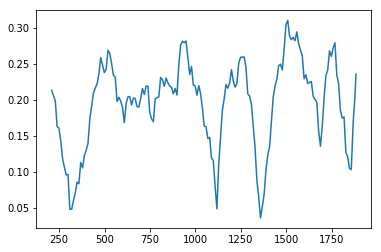

In [798]:
plt.plot(vec_to_sim_dic.keys(),vec_to_sim_dic.values())

In [799]:
vec_to_sim_dic

{209: 0.2136184929335725,
 219: 0.20652509348714787,
 229: 0.19898591826140466,
 239: 0.16325241842052196,
 249: 0.16106391742938828,
 259: 0.14338829891735072,
 269: 0.1189237817525671,
 279: 0.10702893139916486,
 289: 0.09594294252511162,
 299: 0.09697687544221875,
 309: 0.04850375313295735,
 319: 0.04817557077729882,
 329: 0.060381569637791815,
 339: 0.07127416037935624,
 349: 0.08616585916656401,
 359: 0.08386891318953478,
 369: 0.11347692402709464,
 379: 0.10592037509091941,
 389: 0.1231271240677796,
 399: 0.1303144311487136,
 409: 0.14002615454771478,
 419: 0.17336082385630838,
 429: 0.19194196627820362,
 439: 0.2096475874856184,
 449: 0.21694842532674857,
 459: 0.22256808223233346,
 469: 0.2360393434226951,
 479: 0.2590681115304401,
 489: 0.2483668691729785,
 499: 0.23829623444922346,
 509: 0.24294023629713438,
 519: 0.2691784633306469,
 529: 0.26511613089379205,
 539: 0.25070591311315316,
 549: 0.2346237542865053,
 559: 0.2320298332050115,
 569: 0.19814584154617823,
 579: 0.203

In [848]:
print(list(vec_to_sim_dic.keys())[-1]/window_size)
print(list(vec_to_sim_dic.keys())[-1]/one_topic)
print(window_size)
print(one_topic)
print(one_topic/3)

9.019138755980862
4.509569377990431
209
418
139.33333333333334


In [801]:
list(vec_to_sim_dic.keys())[-1]

1885

In [849]:
part1=[value for idx, value in vec_to_sim_dic.items() if 1< idx <=one_topic]
part2=[value for idx, value in vec_to_sim_dic.items() if one_topic*1< idx <=one_topic*2]
part3=[value for idx, value in vec_to_sim_dic.items() if one_topic*2< idx <=one_topic*3]
part4=[value for idx, value in vec_to_sim_dic.items() if one_topic*3< idx <=one_topic*4]
part5=[value for idx, value in vec_to_sim_dic.items() if one_topic*4< idx <=one_topic*5]
#part6=[value for idx, value in vec_to_sim_dic.items() if one_topic*5< idx <=one_topic*6]
#part7=[value for idx, value in vec_to_sim_dic.items() if one_topic*6< idx <=one_topic*7]
#part8=[value for idx, value in vec_to_sim_dic.items() if one_topic*7< idx <=one_topic*8]
#part9=[value for idx, value in vec_to_sim_dic.items() if one_topic*8< idx <=one_topic*9]
#part10=[value for idx, value in vec_to_sim_dic.items() if window_size*9< idx <=window_size*10]

In [803]:
part1_dic={idx: value for idx, value in vec_to_sim_dic.items() if 1< idx <=window_size*1}
part2_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*1< idx <=window_size*2}
part3_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*2< idx <=window_size*3}
part4_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*3< idx <=window_size*4}
part5_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*4< idx <=window_size*5}
part6_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*5< idx <=window_size*6}
part7_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*6< idx <=window_size*7}
part8_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*7< idx <=window_size*8}
part9_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*8< idx <=window_size*9}
#part10_dic={idx: value for idx, value in vec_to_sim_dic.items() if window_size*9< idx <=window_size*10}

In [804]:
part1_dic_sort=sorted(part1_dic.items(),key=lambda x:x[1])
part2_dic_sort=sorted(part2_dic.items(),key=lambda x:x[1])
part3_dic_sort=sorted(part3_dic.items(),key=lambda x:x[1])
part4_dic_sort=sorted(part4_dic.items(),key=lambda x:x[1])
part5_dic_sort=sorted(part5_dic.items(),key=lambda x:x[1])
part6_dic_sort=sorted(part6_dic.items(),key=lambda x:x[1])
part7_dic_sort=sorted(part7_dic.items(),key=lambda x:x[1])
part8_dic_sort=sorted(part8_dic.items(),key=lambda x:x[1])
part9_dic_sort=sorted(part9_dic.items(),key=lambda x:x[1])
#part10_dic_sort=sorted(part10_dic.items(),key=lambda x:x[1])
#sorted(vec_to_sim_dic.items(), key=lambda x:x[1])

In [805]:
part1_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part1) ]
part2_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part2) ]
part3_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part3) ]
part4_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part4) ]
part5_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part5) ]
part6_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part6) ]
part7_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part7) ]
part8_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part8) ]
part9_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part9) ]
#part10_min_key=[token_num for token_num, val in vec_to_sim_dic.items() if val ==min(part10) ]

In [850]:
part1_min=min(part1)
part2_min=min(part2)
part3_min=min(part3)
part4_min=min(part4)
part5_min=min(part5)
#part6_min=min(part6)
#part7_min=min(part7)
#part8_min=min(part8)
#part9_min=min(part9)
#part10_min=min(part10)

In [807]:
part1_min_key

[209]

In [828]:
min_list=np.vstack((part1_min,part2_min,part3_min,part4_min,part5_min,part6_min,part7_min,
           part8_min,part9_min,part10_min))

In [859]:
min_list=np.vstack((part1_min,part2_min,part3_min,part4_min,part5_min))

In [809]:
min_key_list=np.vstack((part1_min_key,part2_min_key,part3_min_key,part4_min_key,
                       part5_min_key,part6_min_key,part7_min_key,part8_min_key,
                       part9_min_key,part10_min_key,))

In [860]:
sort_min_list=sorted(min_list)

In [861]:
sort_min_list

[array([0.03640504]),
 array([0.04817557]),
 array([0.04905463]),
 array([0.10366142]),
 array([0.16871656])]

In [862]:
minimum1=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[0]]
minimum2=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[1]]
minimum3=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[2]]
minimum4=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[3]]
minimum5=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[4]]

In [863]:
print(minimum1[0])
print(minimum2)
print(minimum3)

1359
[319]
[1119]


In [864]:
minimum=[minimum1[0]].copy()
minimum.append(minimum2[0])
minimum.append(minimum3[0])
minimum.append(minimum4[0])
minimum.append(minimum5[0])


######## 군집의 수 : X     지점의 수 : X - 1  ##########

In [865]:
minimum

[1359, 319, 1119, 1859, 609]

In [866]:
sort_minimum=sorted(minimum)

In [867]:
sort_minimum

[319, 609, 1119, 1359, 1859]

In [868]:
sort_minimum[0]

319

In [869]:
print(window_size)
print(one_topic)
print(one_topic/3)

209
418
139.33333333333334


In [870]:
token_list_allword[sort_minimum[0]]
idx1 = token_list_allword[sort_minimum[0]].index
lexrank.sentences[idx1].text

"저희 연합뉴스TV는 지난 4월부터 매주 1차례씩 15차례에 걸쳐 '아기는 우리의 희망' 연속기획 리포트로 저출산의 원인과 현주소, 그리고 대안을 짚어봤습니다"

In [871]:
token_list_allword[sort_minimum[1]]
idx2 = token_list_allword[sort_minimum[1]].index
lexrank.sentences[idx2].text

'정부 대책도 중요하겠지만 일 가정 양립, 흔히 말하는 워라밸이 잘 지켜져야 애를 돌볼 시간이 있을텐데요'

In [872]:
token_list_allword[sort_minimum[2]]
idx3 = token_list_allword[sort_minimum[2]].index
lexrank.sentences[idx3].text

"저출산 이야기를 하면서 우리사회가 여태 '비정상'으로 바라봤던 가족들, 미혼모나 입양가정, 이런 사람들에 대한 시선이 어땠는가도 한번 되돌아 봤으면 합니다"

In [873]:
token_list_allword[sort_minimum[3]]
idx4 = token_list_allword[sort_minimum[3]].index
lexrank.sentences[idx4].text

'인도와의 관계를 주변 4강 수준으로 격상하겠다는 문 대통령의 의지가 반영된 것으로 풀이됩니다'

In [874]:
token_list_allword[sort_minimum[4]]
idx5 = token_list_allword[sort_minimum[4]].index
lexrank.sentences[idx5].text

'KBS 뉴스 이재희입니다'

In [666]:
token_list_allword[sort_minimum[1]]

보다

In [665]:
token_list_allword[sort_minimum[2]]

의지

In [615]:
token_list_allword[sort_minimum[0]]
idx1 = token_list_allword[sort_minimum[0]].index
lexrank.sentences[idx1].text

"저희 연합뉴스TV는 지난 4월부터 매주 1차례씩 15차례에 걸쳐 '아기는 우리의 희망' 연속기획 리포트로 저출산의 원인과 현주소, 그리고 대안을 짚어봤습니다"

In [616]:
idx_t = token_list_allword[1123].index
lexrank.sentences[idx_t].text

'똑! 기자 꿀! 정보 시간입니다'

In [619]:
token_list_allword[1123]

정보

In [416]:
start = 0
cluster = []
for b in bound_token_idx:
    token = token_list_allword[b].token
    idx = token_list_allword[b].index
    boundary = lexrank.sentences[idx].tokens
    pos = boundary.index(str(token))
    if(pos<len(boundary)//2):
        cluster.append(lexrank.sentences[start:idx+1])
        start=idx+1
    else:
        cluster.append(lexrank.sentences[start:idx])
        start=idx
if(start<len(lexrank.sentences)):
    cluster.append(lexrank.sentences[start:])
print(len(cluster))
print(len(lexrank.sentences))

2
102


In [417]:
for i, c in enumerate(cluster):
    print("[cluster{}]".format(i+1))
    for j, s in enumerate(c):
        print("문장{}: {}".format(j, s.text))
        print("pagerank: {}".format(s.pagerank))

[cluster1]
문장0: 최저임금 이의신청 기간이 그제(7월 30일) 종료됐습니다
pagerank: 0.08815587639029673
문장1: 경영계의 압박이 거세지고 있는 가운데 정부는 이번 주 안으로 재심의 여부를 결론낼 방침으로 알려졌습니다
pagerank: 0.0757737858023963
문장2: 박기완 기자와 자세한 이야기 나눠보겠습니다
pagerank: 0.0749605821620238
문장3: 박 기자, 앞서 경총과 중기중앙회가 내년 최저임금에 대해 이의를 제기했죠?
pagerank: 0.11509848034762905
문장4: 네, 경영자총협회와 중소기업중앙회는 각각 지난달 23일과 26일 내년도 최저임금안에 대한 이의제기서를 제출했는데요
pagerank: 0.11047664239434661
문장5: 쉽게 말해 최저임금위에서 결정한 내년 최저임금이 부담을 감내할 수준이 아니니 다시 논의해야 된다는 건데요
pagerank: 0.08243718471366715
문장6: 경총은 "경기둔화 국면에서 2년 새 최저임금이 29.1% 인상된다면, 경영여건이 열악한 기업은 한계 상황으로 내몰리고 고용 부진이 심화할 것"이라고 주장했습니다
pagerank: 0.0896460022328253
문장7: 중기중앙회는 "중소제조업체의 노동생산성 증가 속도보다 최저임금 인상 속도가 2배 빠르다"고 설명했는데요
pagerank: 0.10164993876043685
문장8: 또 소상공인과 영세중소기업 등 지불주체의 지급 능력도 고려되어야 한다고 강조했습니다
pagerank: 0.08237303803270937
문장9: 최저임금 이의제기 기간은 지난달 30일까지였는데요
pagerank: 0.09725317273962031
문장10: 고용부는 이르면 오늘(1일) 이의제기에 대한 결론을 회신하고 내년 최저임금을 최종 고시할 예정입니다
pagerank: 0.2286853427885345
문장11: 특히 소상공인업계의 반발이 거센데, 행정 소송도 제기했죠?
pagerank: 